<a href="https://colab.research.google.com/github/farzin23i/PyML-SpringSchool2021/blob/main/Workshop2/PMLSC23_210506.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In a neural network, the process of each node is similar to what happens in regression!

<center><img src='https://drive.google.com/uc?id=1AxKd0byAmswQr1SKc2dP4-xvIb38RR2V' height=400/></center>


# MNIST problem

In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from pylab import plt
plt.style.use ('seaborn')

Let's have a look at the data, first we see how many objects, of what kind and shape is in it:

In [2]:
len(mnist.load_data()[0])

11493376/11490434 [==============================] - 0s 0us/step


2

In [ ]:
mnist.load_data()[0][0].shape 

(60000, 28, 28)

In [ ]:
mnist.load_data()[0][1].shape

(60000,)

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print (f'The train dataset has shape {X_train.shape} and the labels shape is: {y_train.shape}')
print (f'The test dataset has shape {X_test.shape} and the labels shape is: {y_test.shape}')

The train dataset has shape (60000, 28, 28) and the labels shape is: (60000,)
The test dataset has shape (10000, 28, 28) and the labels shape is: (10000,)


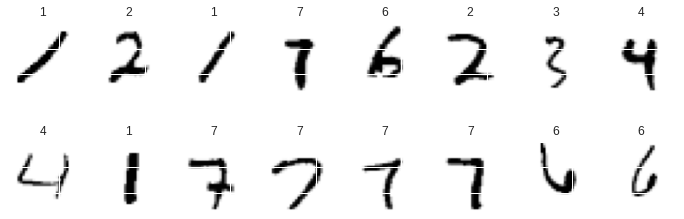

In [4]:
# plot some of the data with their labels as titles:
fig, ax= plt.subplots (2, 8, figsize= [12,4])
for i in range (2):
    for j in range (8):
        rnd= np.random.randint (len(X_train))
        ax[i, j].imshow (X_train[rnd])
        ax[i, j].set_title (y_train [rnd])
        ax[i, j].set_xticklabels([])
        ax[i, j].set_yticklabels([])

In [ ]:
# The data stored in the labels is just a number, the label of image:
y_train[4001]

3

In [ ]:
# The data stored in any image is shomthing like this, just a tensor:
X_train[4001].reshape ([-1])

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  21,  56,  56,  21,  98, 255, 129,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0, 120, 226, 253, 253, 226, 247,
       253, 211,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0, 214, 254, 25

In [ ]:
# All are numbers between 0 and 255:
np.unique(X_train[4001])

array([  0,   1,   4,   8,   9,  12,  14,  15,  16,  18,  19,  21,  25,
        30,  31,  35,  37,  49,  56,  58,  63,  64,  65,  67,  69,  74,
        78,  80,  81,  91,  92,  96,  98, 110, 111, 112, 113, 120, 123,
       129, 132, 139, 140, 143, 144, 152, 153, 155, 169, 171, 174, 177,
       181, 182, 184, 187, 193, 195, 198, 200, 203, 204, 208, 211, 212,
       214, 215, 218, 224, 226, 227, 229, 233, 235, 239, 241, 243, 245,
       247, 248, 249, 250, 252, 253, 254, 255], dtype=uint8)

We must encode the labels for a classification task:

In [6]:
from tensorflow.keras.utils import to_categorical

In [7]:
y_train = to_categorical (y_train, num_classes=10, dtype= 'int')
y_test = to_categorical (y_test, num_classes=10, dtype= 'int')

In [10]:
# The label of 800th image is 9, the one-hot encoded 9 is:
y_train[800]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [9]:
X_train.shape[0]

60000

In this notebook, we will flatten the data of the image and deal with it like a 1D array:

In [11]:
X_train = X_train.reshape ([X_train.shape[0], -1,])
X_test = X_test.reshape ([X_test.shape[0], -1,])

print (X_train.shape, X_test.shape )

(60000, 784) (10000, 784)


In [12]:
# We always normalize the data before passing it to NN:
X_train =  X_train/255
X_test =  X_test/255

In [13]:
max(X_train[0])

1.0

# Build a simple 1D NN model

In [14]:
X_train[0].shape

(784,)

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers, regularizers

from tensorflow.keras.utils import plot_model

In [ ]:
model = Sequential ([
                     Dense(256, activation='relu', kernel_regularizer = regularizers.l2(1e-5), input_shape= (X_train[0].shape)), 
                     Dense(256, activation='relu', kernel_regularizer = regularizers.l2(1e-5)),
                    #  Dense(128, activation='relu'),

                     Dense(10, activation= 'softmax')
])

In [ ]:
sgd = optimizers.SGD ()
model.compile (optimizer= sgd, loss= 'categorical_crossentropy', metrics= ['accuracy'])

history = model.fit (X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/10
750/750 [==============================] - 3s 4ms/step - loss: 1.4675 - accuracy: 0.6150 - val_loss: 0.4336 - val_accuracy: 0.8880
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.4247 - accuracy: 0.8867 - val_loss: 0.3334 - val_accuracy: 0.9085
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3433 - accuracy: 0.9049 - val_loss: 0.2930 - val_accuracy: 0.9209
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.3029 - accuracy: 0.9156 - val_loss: 0.2677 - val_accuracy: 0.9269
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2766 - accuracy: 0.9242 - val_loss: 0.2510 - val_accuracy: 0.9302
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2608 - accuracy: 0.9274 - val_loss: 0.2334 - val_accuracy: 0.9344
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2346 - accuracy: 0.9351 - val_loss: 0.2206 - val_accuracy: 0.9401
Epoch 

Have a look at learning curves till now:


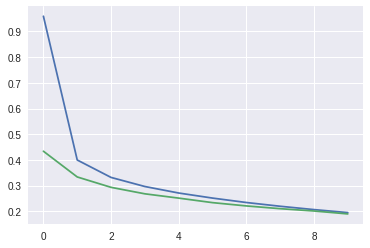

In [ ]:
plt.plot (history.history['loss'])
plt.plot (history.history['val_loss'])

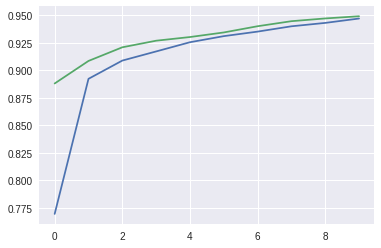

In [ ]:
plt.plot (history.history['accuracy'])
plt.plot (history.history['val_accuracy'])

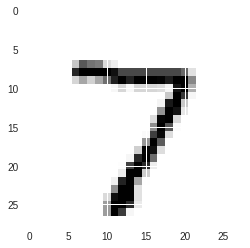

In [ ]:
plt.imshow (X_test[0].reshape ((28,28)))

In [ ]:
# various ways of printing a variable:
print(f'the predicted label is: {np.argmax (model.predict (X_test[:5])[0])}')
print('the predicted label is: {}'.format (np.argmax (model.predict (X_test[:5])[0])))


the predicted label is: 2
the predicted label is: 2


The image and the predicted labels of 0th image are not compatible. So our model is not learned yet!

In [ ]:
# Have a look at some predicted labels:
model.predict (X_test[:5])

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 5.3727937e-13],
       [0.0000000e+00, 0.0000000e+00, 2.2211962e-21, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.9992645e-01,
        0.0000000e+00, 7.3598290e-05],
       [7.2513467e-05, 5.4246529e-27, 0.0000000e+00, 0.0000000e+00,
        9.1327578e-01, 0.0000000e+00, 2.2292047e-12, 8.6651750e-02,
        0.0000000e+00, 1.4629088e-18],
       [9.2549856e-23, 0.0000000e+00, 3.3123115e-32, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 4.5630018e-34,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 2.5764343e-17,
        0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [ ]:
model.evaluate (X_test, y_test, verbose=0)

[0.18741962313652039, 0.9487000107765198]

##  Using tensorboard

In [ ]:
import time
from tensorflow.keras.callbacks import TensorBoard

%load_ext tensorboard

In [ ]:
tensorboard_callback = TensorBoard(log_dir= f"logs/{1}_{time.time()}", histogram_freq=1)

In [ ]:
%tensorboard --logdir logs